In [1]:
 #add matplotlib inline magic command
%matplotlib inline

#dependencies and set up

import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
city_data_to_load = os.path.join("Resources\city_data.csv")
ride_data_to_load = os.path.join("Resources/ride_data.csv")

In [3]:
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178
4,South Jack,3/6/2019 4:28,34.58,3908451377344
5,South Latoya,3/11/2019 12:26,9.52,1994999424437
6,New Paulville,2/27/2019 11:17,43.25,793208410091
7,Simpsonburgh,4/26/2019 0:43,35.98,111953927754
8,South Karenland,1/8/2019 3:28,35.09,7995623208694
9,North Jasmine,3/9/2019 6:26,42.81,5327642267789


In [6]:
#get columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
#get the unique values of the type of city

sum(city_data_df["type"]=="Rural")

18

In [10]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
#merge the two data sets

pyber_data_df = pd.merge(ride_data_df,city_data_df,how="left",on=["city","city"])

#disply new dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


In [14]:
#creating data frames for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


In [15]:
#get the number of rides for city type
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [16]:
#calculate avg fare for eacy city type

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]


In [17]:
#get the avg number of drivers for each city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]


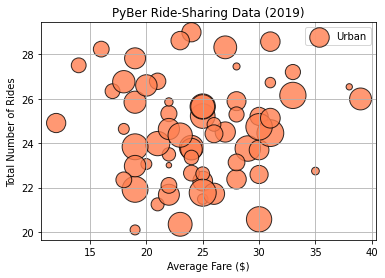

In [18]:
#build scatter plot for urban cities

plt.scatter(urban_ride_count,
            urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor = "black", linewidth = 1,
           alpha = 0.8,label = "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides")
plt.grid(True)
plt.legend()

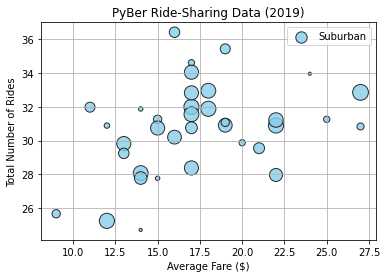

In [19]:
#build scatter plot for suburban cities

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor = "black", linewidth = 1,
           alpha = 0.8,label = "Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides")
plt.grid(True)
plt.legend()

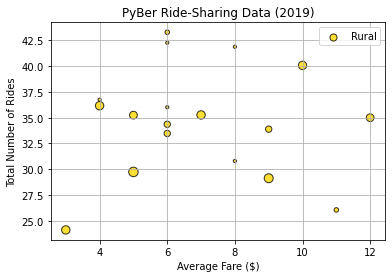

In [20]:
#build scatter plot for rural cities

plt.scatter(rural_ride_count,
            rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor = "black", linewidth = 1,
           alpha = 0.8,label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides")
plt.grid(True)
plt.legend()

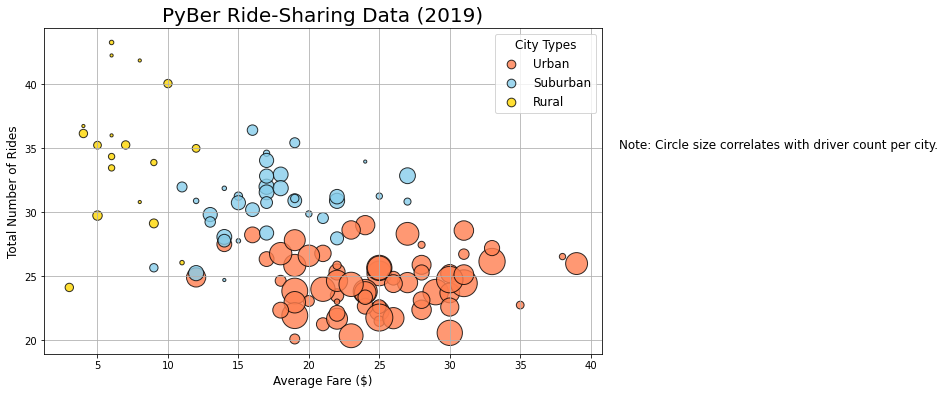

In [22]:
plt.subplots(figsize = (10,6))

plt.scatter(urban_ride_count,
            urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor = "black", linewidth = 1,
           alpha = 0.8,label = "Urban")

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor = "black", linewidth = 1,
           alpha = 0.8,label = "Suburban")

plt.scatter(rural_ride_count,
            rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor = "black", linewidth = 1,
           alpha = 0.8,label = "Rural")


plt.title("PyBer Ride-Sharing Data (2019)",fontsize = 20)
plt.xlabel("Average Fare ($)",fontsize = 12)
plt.ylabel("Total Number of Rides", fontsize = 12)
plt.grid(True)

#create a legend

lgnd = plt.legend(fontsize ="12", mode = "Expanded",
                 scatterpoints = 1, loc = "best", title="City Types")

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)



#incorporate a text label about circle size

plt.text(42,35, "Note: Circle size correlates with driver count per city.", fontsize="12")

#show plot
#plt.show()

#save the figure

plt.savefig("analysis/Fig1.png")